In [2]:
import numpy as np
from sklearn.utils.extmath import randomized_svd as rsvd
from matplotlib import pyplot as plt
import time

## SVD

In [3]:
# Hilbert matrix
def A(i, j):
    return 1.0/(i + j + 1)

In [4]:
M = 1500; N = 1024 # number of rows and columns
x = np.linspace(1, N, N) # grid for drawings
r = 20 # target rank
# fill the matrix Ma
Ma = np.fromfunction(A, [M, N])

In [5]:
# Estimate the time, does not save the data
start = time.time()
U, s, V = np.linalg.svd(Ma)
# Truncation of SVD
Ut = U[:, :r] # m \times r
st = s[:r] # r
Vt = V[:r, :] # r \times n
np.linalg.norm(Ma - Ut @ np.diag(st) @ Vt)
print("Classical ", time.time() - start, " sec")
start = time.time()
Ur, sr, Vr = rsvd(Ma, n_components = r, random_state = np.random.randint(1))
print("Randomized ", time.time() - start, " sec")

Classical  0.2365562915802002  sec
Randomized  0.24429988861083984  sec


Relative error of sigmas= 7.921972539071859e-16
Classical relative approximation error =  3.322653783517555e-11
Randomized straight-forward error =  3.3226596858840554e-11
Initial storage 1536000  memory cells 
 Compressed storage  50500  memory cells 


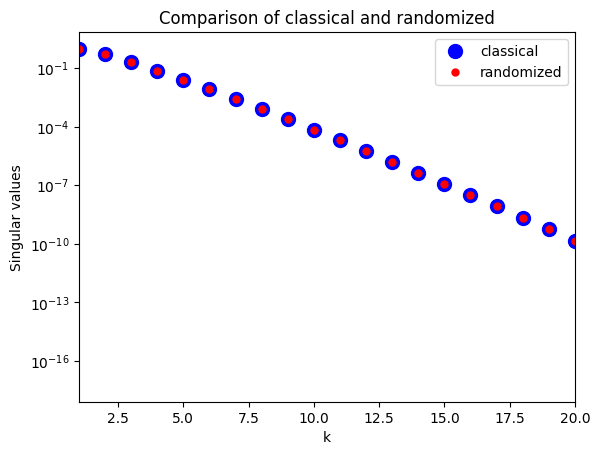

In [6]:
# Check the error for singular values
plt.title("Comparison of classical and randomized")
plt.plot(x, s / s[0], 'bo', markersize = 10, label = 'classical')
plt.plot(x[:r], sr/s[0], 'ro', markersize = 5, label = 'randomized')
plt.ylabel('Singular values')
plt.xlabel('k')
plt.xlim(1, r)
plt.legend()
plt.yscale('log')
print('Relative error of sigmas=', np.linalg.norm(s[:r] - sr) / np.linalg.norm(s[:r]))
print('Classical relative approximation error = ', np.linalg.norm(s[r:]) / np.linalg.norm(s))
print('Randomized straight-forward error = ', np.linalg.norm(Ma - (Ur @ np.diag(sr) @ Vr)) / np.linalg.norm(s))
print("Initial storage", M * N, " memory cells ")
print(" Compressed storage ", (1 + M + N) * r, " memory cells ")

In [7]:
"""
Maybe some time later

eps = 1e-6
def cross_method(m, n, A):
    I = list(range(m))
    J = list(range(m))
    r = 0
    
    def norm_update(U, V, u, v):
        
    
    while true:
        r += 1
        i = 
        
        if abs((A - U @ V)[i, j]) * np.sqrt( (m - r) * (n - r) ) < eps * 
        
        I.pop(i)
        J.pop(j)
        
        
    return U, V, r
    
"""

'\nMaybe some time later\n\neps = 1e-6\ndef cross_method(m, n, A):\n    I = list(range(m))\n    J = list(range(m))\n    r = 0\n    \n    def norm_update(U, V, u, v):\n        \n    \n    while true:\n        r += 1\n        i = \n        \n        if abs((A - U @ V)[i, j]) * np.sqrt( (m - r) * (n - r) ) < eps * \n        \n        I.pop(i)\n        J.pop(j)\n        \n        \n    return U, V, r\n    \n'

## Tensor decomposition

### CP format

In [8]:
nsteps = 10

def ALS(A, R):
    """CP decomposition ALS 
       for Alternative least squares for order three tensor
       (requires know absolute rank R)
    """
    
    U = np.random.rand(R, A.shape[0])
    V = np.random.rand(R, A.shape[1])
    W = np.random.rand(R, A.shape[2])
    
        

In [9]:
U = np.random.rand(10, 5)
V = np.random.rand(13, 5)

np.einsum('ja,ka->jka', U, V).shape

(10, 13, 5)

In [10]:
import numpy as np


def ALS_2D(R, rank, num_iter = 20, lam = 0.01):
    """CP decomposition ALS 
       for Alternative least squares for order two tensor (matrix) 
       (requires know absolute rank rank)
    """

    global lr_curve

    lr_curve = []
    
    n = R.shape[0]
    m = R.shape[1]
    
    U = np.random.rand(rank, n)
    V = np.random.rand(rank, m)


    for iter in range(num_iter):
        for u in range(n):
            U[:, u] = np.linalg.solve(V @ V.T + lam*np.eye(rank, rank),
                                      V @ R[u, :])
    
        
        for i in range(m):
            
            
            #V[:, i] = np.linalg.solve(sum([U[:, u][:, None] @ U[:, u][None, :] for u in range(n)]) + lam*np.eye(rank, rank), U @ R[:, i])
            V[:, i] = np.linalg.solve(U @ U.T + lam*np.eye(rank, rank), U @ R[:, i])

        
        lr_curve.append(np.linalg.norm(R - U.T @ V))
    
    return U, V
        

In [11]:
np.random.seed(32)

# Sample data
R = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])

# Run ALS
U, V = ALS(R, rank=2, num_iter=1000, lam=0.01)
print(U.shape, V.shape)
predicted_R = U.T @ V
print("Predicted Ratings Matrix:")
print(np.linalg.norm(predicted_R - R))

TypeError: ALS() got an unexpected keyword argument 'rank'

In [ ]:
plt.plot(lr_curve)

## Order 3 tensor

In [12]:
np.random.seed(32)

import numpy as np
from numpy.linalg import pinv

def unfold(tensor, mode):
    """Unfolds a 3D tensor along the specified mode."""
    return np.reshape(np.moveaxis(tensor, mode, 0), (tensor.shape[mode], -1))

def khatri_rao(A, B):
    """Computes the Khatri-Rao product of matrices A and B."""
    assert A.shape[1] == B.shape[1], "Number of columns must match"
    return np.einsum('ir,jr->ijr', A, B).reshape(-1, A.shape[1])

def n_mode_product(tensor, matrix, mode):
    """Computes the n-mode product of a 3D tensor with a matrix along a specified mode."""
    return np.moveaxis(np.tensordot(matrix, tensor, axes=[1, mode]), 0, mode)

def als(tensor, rank, max_iter=100, tol=1e-6):
    I, J, K = tensor.shape
    A = np.random.rand(I, rank)
    B = np.random.rand(J, rank)
    C = np.random.rand(K, rank)
    
    for iteration in range(max_iter):
        # Update A
        B_khatri_C = khatri_rao(B, C)
        A = unfold(tensor, 0) @ pinv(B_khatri_C).T
        
        # Update B
        A_khatri_C = khatri_rao(A, C)
        B = unfold(tensor, 1) @ pinv(A_khatri_C).T

        # Update C
        A_khatri_B = khatri_rao(A, B)
        C = unfold(tensor, 2) @ pinv(A_khatri_B).T

        # Compute reconstruction error
        tensor_approx = np.einsum('ir,jr,kr->ijk', A, B, C)
        error = np.linalg.norm(tensor - tensor_approx) #/ np.linalg.norm(tensor)
        
        if error < tol:
            print(f"Converged in {iteration+1} iterations with error: {error}")
            break
    else:
        print(f"Reached max iterations with error: {error}")
        
    return A, B, C

# Example usage
tensor = np.random.rand(5, 4, 3)  # Sample tensor of dimensions 5x4x3
rank = 3
A, B, C = als(tensor, rank, max_iter=10000)
print("Factor matrices:")
print("A =", A)
print("B =", B)
print("C =", C)

Reached max iterations with error: 1.240713728420401
Factor matrices:
A = [[ 0.7646871   0.64131625  2.37675471]
 [ 1.75792958 -0.98610174  2.5526548 ]
 [ 0.1233991   1.67979261  1.4697178 ]
 [ 1.13480331  0.06600683  2.36027758]
 [ 1.62396606 -1.5064117   2.19286606]]
B = [[-0.53987444  0.32834696  0.84091885]
 [-1.09547697 -0.35788144  1.06194058]
 [ 0.54178161  0.33638343  0.34130077]
 [ 0.24937771 -0.38953178  0.36669126]]
C = [[ 0.10364411 -0.19748671  0.37147213]
 [ 0.45551915  0.61257788  0.43801429]
 [ 0.52632258 -0.13122633  0.44228418]]


In [13]:
np.random.seed(32)

from numpy.linalg import pinv

def ALS_3D(R, rank, num_iter = 20, lam = 0.01):
    """CP decomposition ALS 
       for Alternative least squares for order two tensor (matrix) 
       (requires know absolute rank rank)
    """

    global lr_curve

    lr_curve = []
    
    n = R.shape[0]
    m = R.shape[1]
    k = R.shape[2]
    
    U = np.random.rand(rank, n)
    V = np.random.rand(rank, m)
    W = np.random.rand(rank, k)
   
    
    
    for iter in range(num_iter):
        
        
        # Update U
        R_fold = np.moveaxis(R, 0, 0).reshape((n, m * k))
        
        V_W = np.einsum('rj,rk->rjk', V, W).reshape(U.shape[0], V.shape[1] * W.shape[1])
        
        A = V_W @ V_W.T + lam * np.eye(rank, rank)
        for u in range(n):
            B = R_fold[u, :] @ V_W.T
            U[:, u] = np.linalg.solve(A, B)
        
        #A = V_W
        #B = R_fold
        
        #print(A.shape, B.shape)
        
        #U = B @ pinv(A).T
        
        # Update V
        R_fold = np.moveaxis(R, 1, 0).reshape((m, n * k))
        
        U_W = np.einsum('ri,rk->rik', U, W).reshape(U.shape[0], U.shape[1] * W.shape[1])
        
        A = U_W @ U_W.T + lam * np.eye(rank, rank)
        for v in range(m):
            B = R_fold[v, :] @ U_W.T
            V[:, v] = np.linalg.solve(A, B)

        # Update W
        R_fold = np.moveaxis(R, 2, 0).reshape((k, n * m))
        
        U_V = np.einsum('ri,rj->rij', U, V).reshape(W.shape[0], U.shape[1] * V.shape[1])
        
        A = U_V @ U_V.T + lam * np.eye(rank, rank)
        for w in range(k):
            B = R_fold[w, :] @ U_V.T
            W[:, w] = np.linalg.solve(A, B)        
        
        
        lr_curve.append(np.linalg.norm(R - np.einsum('ri,rj,rk->ijk', U, V, W)))
        
        
    return U, V, W
        
# Example usage
tensor = np.random.rand(5, 4, 3)  # Sample tensor of dimensions 5x4x3
rank = 3
U, V, W = ALS_3D(tensor, rank, num_iter=10000, lam = 0.001)
print("Factor matrices:")
print("U =", U)
print("V =", V)
print("W =", W)
print(lr_curve[-1])

Factor matrices:
U = [[ 0.35265214  0.85827158  0.04048243  0.54530455  0.79240577]
 [ 0.2671318  -0.40907745  0.69847155  0.02559148 -0.62670029]
 [ 0.83531624  0.88121007  0.5225565   0.82358496  0.75481422]]
V = [[-0.51064829 -1.08654873  0.58485536  0.28162217]
 [ 0.49235221 -0.53386119  0.5074538  -0.57784799]
 [ 0.96784433  1.21347027  0.41694325  0.43795114]]
W = [[ 0.17219581  0.86460125  1.00397709]
 [-0.32013416  0.98714509 -0.20763135]
 [ 0.90446207  1.04222319  1.04718345]]
1.24080886290553


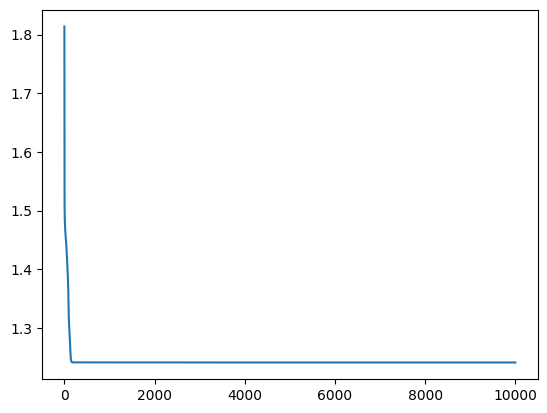

In [14]:
plt.plot(lr_curve)

In [15]:
tensor = np.random.rand(5, 4, 3)

tensor.reshape(5, 4*3)

array([[0.80492251, 0.8796494 , 0.58688924, 0.65584735, 0.29043624,
        0.38836719, 0.12730549, 0.21281151, 0.75505369, 0.57887068,
        0.63183171, 0.9575624 ],
       [0.09425337, 0.12772689, 0.40667553, 0.22271941, 0.53159447,
        0.83057898, 0.60421553, 0.18538948, 0.38130853, 0.28346655,
        0.70331245, 0.25379794],
       [0.76139101, 0.27705392, 0.04512082, 0.94255551, 0.51623923,
        0.74118788, 0.59841033, 0.99493805, 0.15958447, 0.41761247,
        0.4993524 , 0.68251486],
       [0.74356294, 0.04570872, 0.5659992 , 0.95207681, 0.86689532,
        0.20598575, 0.61122462, 0.4219096 , 0.45027546, 0.04400528,
        0.00684583, 0.50835038],
       [0.38884269, 0.57835584, 0.1565324 , 0.8933882 , 0.01109693,
        0.76347618, 0.77305726, 0.57279222, 0.98148999, 0.00867733,
        0.14020093, 0.21361893]])

## Tucker decomposition

In [53]:
def HOSVD_3d(A, r1, r2, r3):
    N1, N2, N3 = A.shape
    
    A1 = A.reshape(N1, N2*N3)
    U1, s, V = np.linalg.svd(A1, full_matrices = False)
    U1 = U1[:, :r1]
    
    A2 = A.transpose([1, 0, 2])
    A2 = A2.reshape(N2, N1*N3)
    U2, s, V = np.linalg.svd(A2, full_matrices = False)
    U2 = U2[:, :r2]
    
    A3 = A.transpose([2, 0, 1])
    A3 = A3.reshape(N3, N1*N2)
    U3, s, V = np.linalg.svd(A3, full_matrices = False)
    U3 = U3[:, :r3]
    
    G = np.einsum('ia,ibc->abc', U1, np.einsum('jb,ijc->ibc', U2, np.einsum('kc,ijk->ijc', U3, A)))

    return G, U1, U2, U3

def stHOSVD_3d(A, r1, r2, r3):
    """Construct Tucker decomposition of 3D tensor via stHOSVD with ranks [r1, r2, r3]"""
    N1, N2, N3 = A.shape
    A1 = A.reshape(N1, N2*N3)
    U, s, V = np.linalg.svd(A1, full_matrices = False)

    U1 = U[:, :r1] # N1 x r1
    
    A1 = np.diag(s[:r1]) @ V[:r1, :] # r1 x N2*N3
    A1 = A1.reshape(r1, N2, N3)
    A1 = A1.transpose(1, 0, 2)
    A1 = A1.reshape(N2, r1 * N3) # N2 x r1 * N3
    U, s, V = np.linalg.svd(A1, full_matrices = False)
    U2 = U[:, :r2] # N2 x r2
    
    A2 = np.diag(s[:r2]) @ V[:r2, :]# r2 x r1 * N3
    A2 = A2.reshape(r2, r1, N3) # r2 x r1 x N3
    A2 = A2.transpose([2, 1, 0]) # r1 x r2 x N3
    A2 = A2.reshape(N3, r1 * r2) # N3, r1 * r2
    U, s, V = np.linalg.svd(A2, full_matrices = False)
    U3 = U[:, :r3] # U3(k, r)
    G = np.diag(s[:r3]) @ V[:r3, :] # r3, r1 * r2
    
    G = G.reshape(r3, r1, r2) # main core
    G = G.transpose([1, 2, 0]) # main core
    
    #G = G.reshape(r1, r2, r3) # main core
    return G, U1, U2, U3

In [57]:
tensor = np.random.rand(5, 4, 3)  # Sample tensor of dimensions 5x4x3
r1, r2, r3 = 2, 2, 2
G, U1, U2, U3 = stHOSVD_3d(tensor, r1, r2, r3)


print(G.shape, U1.shape, U2.shape, U3.shape)
np.linalg.norm(tensor - np.einsum('ia,ajk->ijk', U1, np.einsum('jb,abk->ajk', U2, np.einsum('kc,abc->abk', U3, G))))

(2, 2, 2) (5, 2) (4, 2) (3, 2)


1.7680147534532424

In [58]:
tensor = np.random.rand(5, 4, 3)  # Sample tensor of dimensions 5x4x3
r1, r2, r3 = 2, 2, 2
G, U1, U2, U3 = HOSVD_3d(tensor, r1, r2, r3)


print(G.shape, U1.shape, U2.shape, U3.shape)
np.linalg.norm(tensor - np.einsum('ia,ajk->ijk', U1, np.einsum('jb,abk->ajk', U2, np.einsum('kc,abc->abk', U3, G))))

(2, 2, 2) (5, 2) (4, 2) (3, 2)


1.4933024770559322

## TT decomposition

In [32]:
def TTSVD_3d(A, r1, r2):
    N1, N2, N3 = A.shape
    A1 = A.reshape(N1, N2 * N3)
    U, s, V = np.linalg.svd(A1, full_matrices=False)
    
    G1 = U[:, :r1] # N1 x r1
    V1 = np.diag(s[:r1]) @ V[:r1, :] # r1 x N2 * N3

    V1 = V1.reshape(r1 * N2, N3)
    U, s, V = np.linalg.svd(V1, full_matrices = False)
    G2 = U[:, :r2] # r1*N2 x r2
    G2 = G2.reshape(r1, N2, r2) # r1 x N2 x r2
    G3 = np.diag(s[:r2]) @ V[:r2, :] # r2 x N3

    return G1, G2, G3

In [43]:
tensor = np.random.rand(5, 4, 3)  # Sample tensor of dimensions 5x4x3
r1, r2 = 5, 3
G1, G2, G3 = TTSVD_3d(tensor, r1, r2)


print(G.shape, V1.shape, V2.shape, V3.shape)
np.linalg.norm(tensor - np.einsum('ijb,bk->ijk', np.einsum('ia,ajb->ijb', G1, G2), G3))

(3, 3, 3) (3, 5) (3, 4) (3, 3)


3.727549004879978e-15